In [51]:
from sklearn.model_selection import train_test_split
import pandas as pd



df=pd.read_csv('finalPCA.csv')

X=df.drop(['y'],axis=1)
y=df['y']



x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("x_train.shape:" ,x_train.shape)
print("y_train.shape:" ,y_train.shape)
print("x_test.shape:" ,x_test.shape)
print("y_test.shape:" ,y_test.shape)

x_train.shape: (36168, 18)
y_train.shape: (36168,)
x_test.shape: (9043, 18)
y_test.shape: (9043,)


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Input(shape=(18,)),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


smote_tomek = SMOTETomek(random_state=42)

X_resampled, y_resampled = smote_tomek.fit_resample(x_train, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)
history = model.fit(X_train_scaled, y_resampled, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=64)



Epoch 1/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6874 - loss: 0.5996 - val_accuracy: 0.8247 - val_loss: 0.3496
Epoch 2/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8617 - loss: 0.3503 - val_accuracy: 0.8233 - val_loss: 0.3419
Epoch 3/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8697 - loss: 0.3376 - val_accuracy: 0.8276 - val_loss: 0.3336
Epoch 4/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8784 - loss: 0.3180 - val_accuracy: 0.8316 - val_loss: 0.3234
Epoch 5/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8790 - loss: 0.3103 - val_accuracy: 0.8431 - val_loss: 0.3128
Epoch 6/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8814 - loss: 0.3032 - val_accuracy: 0.8445 - val_loss: 0.3150
Epoch 7/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8836 - loss: 0.3039 - val_accuracy: 0.8498 - val_loss: 0.3212
Epoch 8/100
980/980 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8829 - loss: 0.3027 - val_accu

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test_scaled).round()))

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7952
           1       0.47      0.83      0.60      1091

    accuracy                           0.87      9043
   macro avg       0.72      0.85      0.76      9043
weighted avg       0.91      0.87      0.88      9043



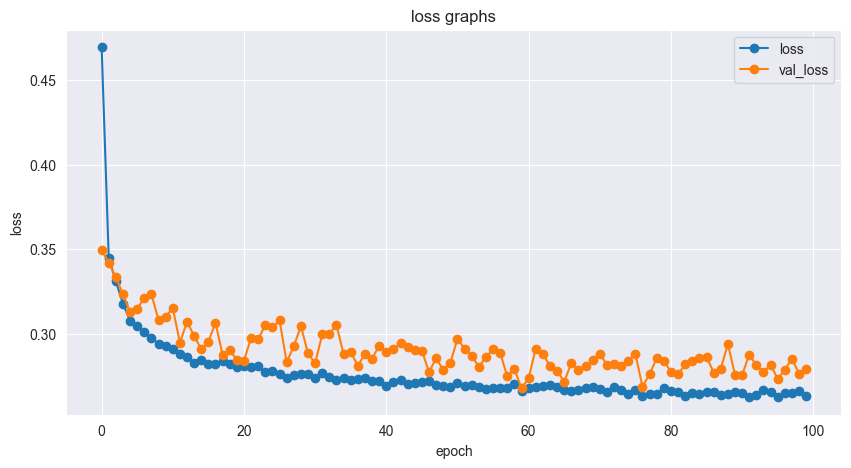

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='loss', marker='o')
plt.plot(history.history['val_loss'], label='val_loss',marker='o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("loss graphs")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, model.predict(X_test_scaled).round()))

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[6922 1030]
 [ 190  901]]
